# Unsupervised Learning for Visualization: t-Distributed Stochastic Neighbor Embedding

## Load Libraries and Data

In [1]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import (accuracy_score, classification_report,
                             precision_score, recall_score, f1_score)
from xgboost import XGBClassifier, XGBRegressor
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Make this notebook's output stable across runs
random_state = 1000
np.random.seed(random_state)

# Plot formatting
%matplotlib inline
sns.set()
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
# Load handwritten digits data
X, y = load_digits(return_X_y=True)

X, y = shuffle(X, y, random_state=random_state)
X[0, :].reshape(8, 8)

array([[ 0.,  0., 15., 14., 15.,  9.,  0.,  0.],
       [ 0.,  0., 12., 10.,  7.,  6.,  4.,  0.],
       [ 0.,  1., 14.,  2.,  0.,  0.,  0.,  0.],
       [ 0.,  5., 16., 12., 10.,  4.,  0.,  0.],
       [ 0.,  4., 11.,  8., 11., 15.,  5.,  0.],
       [ 0.,  0.,  0.,  0.,  0., 13.,  7.,  0.],
       [ 0.,  4., 16., 10., 11., 14.,  1.,  0.],
       [ 0.,  1., 10., 16., 15.,  4.,  0.,  0.]])

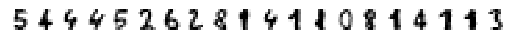

In [3]:
# Visualize the first few instances
_, ax = plt.subplots(1, 20)
for i, a in enumerate(ax):
    a.set_axis_off()
    a.imshow(X[i, :].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')

In [4]:
# Labels of first instances
y[:20]

array([5, 4, 4, 4, 5, 2, 6, 2, 8, 1, 4, 1, 1, 0, 8, 1, 4, 1, 1, 3])

## Fit a Model on Original Features

In [5]:
(X_train, X_test,
 y_train, y_test) = train_test_split(X, y, test_size=0.2,
                                     random_state=random_state)

In [6]:
# Create an XGBoost classifier and fit to training data
xgbclf = XGBClassifier(eval_metric='mlogloss')

xgbclf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob',
              predictor=None, ...)

In [7]:
# Evaluate on test data
y_pred = xgbclf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        40
           1       0.93      0.97      0.95        39
           2       0.94      1.00      0.97        29
           3       0.95      0.97      0.96        38
           4       1.00      0.95      0.97        38
           5       1.00      0.98      0.99        47
           6       1.00      0.97      0.99        35
           7       0.97      1.00      0.98        28
           8       0.97      0.92      0.94        37
           9       0.96      0.93      0.95        29

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



## Reduce Dimensionality with t-SNE

In [8]:
# Fit t-SNE model
m = TSNE(n_components=2, random_state=random_state)
X_transform = m.fit_transform(X)

In [9]:
X_transform[:5]

array([[ -2.8602731 ,  26.284403  ],
       [ 34.101936  ,  -3.8112404 ],
       [ 41.407593  , -17.280025  ],
       [ 41.1034    , -11.464571  ],
       [  0.26673192,  24.39594   ]], dtype=float32)

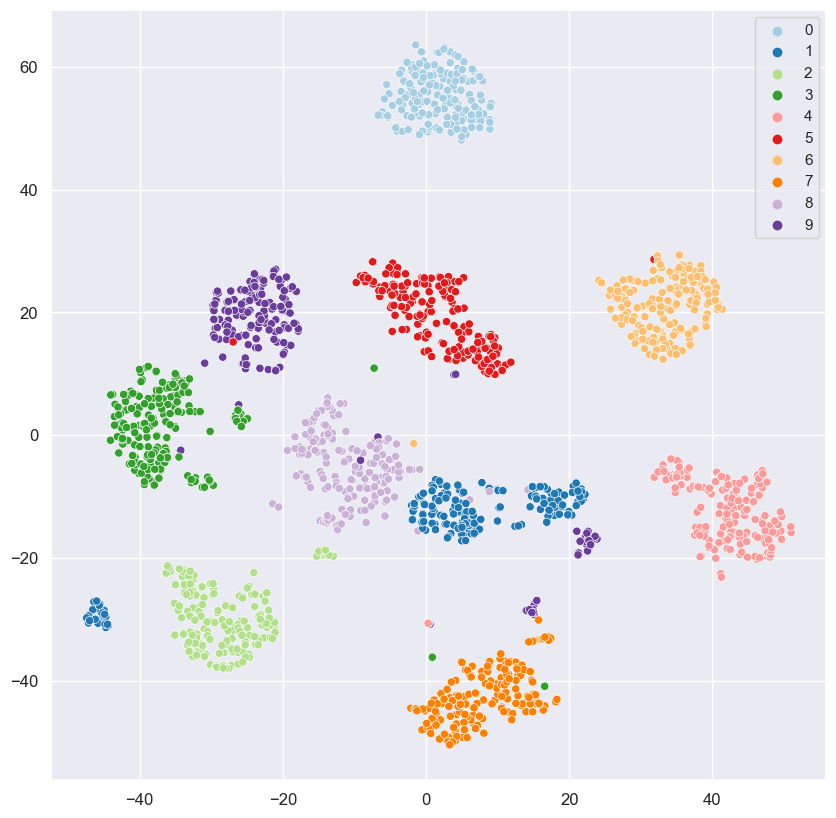

In [10]:
plt.subplots(figsize=(10, 10))
sns.scatterplot(x=X_transform[:, 0], y=X_transform[:, 1], hue=y,
                palette=sns.color_palette('Paired')[:10])
plt.show()

## Fit a Model to Reduced Features

In [11]:
(X_train, X_test,
 y_train, y_test) = train_test_split(X_transform, y, test_size=0.2,
                                     random_state=random_state)

In [12]:
# Create an XGBoost classifier and fit to training data
xgbclf = XGBClassifier(eval_metric='mlogloss')

xgbclf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob',
              predictor=None, ...)

In [13]:
# Evaluate on test data
y_pred = xgbclf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.97      1.00      0.99        39
           2       1.00      1.00      1.00        29
           3       1.00      1.00      1.00        38
           4       1.00      1.00      1.00        38
           5       0.98      0.98      0.98        47
           6       1.00      1.00      1.00        35
           7       1.00      1.00      1.00        28
           8       0.97      0.97      0.97        37
           9       0.96      0.93      0.95        29

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

